In [67]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Importing Dataset

In [68]:
df = pd.read_csv("C:/Users/vjiph/Downloads/vgsales.csv")

### Glimpse of the Dataset

In [69]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [70]:
df.info() #we can see that there are total 16598 rows but year has 16327 rows; therefore there are NAN values present in year
        #also the data type of year is float so convert it into integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
genres = np.unique(df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

#### Inference: 
We can see that the dataset consists of 16598 Games across 11 different attributes

### Cleaning and filtering the data

In [72]:
df = df.drop_duplicates()
df.duplicated().values.any()

False

In [73]:
pd.isnull(df).any() #checking for null values

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [74]:
df = df.dropna() #removing the rows with null values
df.Year = df.Year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [75]:
pd.isnull(df).any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

##### As we can see there are no NaN values anymore

### Feature Engineering

In [76]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [77]:
df.describe(include = 'object')

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


### Data Visualisation

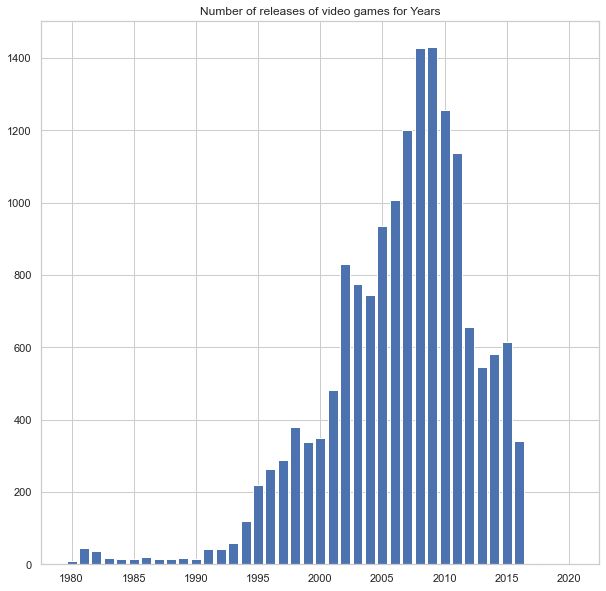

In [78]:
plt.figure(figsize = (10,10))
plt.bar(df["Year"].value_counts().index, df["Year"].value_counts())
plt.title("Number of releases of video games for Years")
plt.show()

### Inference:
This graph shows that the maximum number of video games were released in the year 2009.

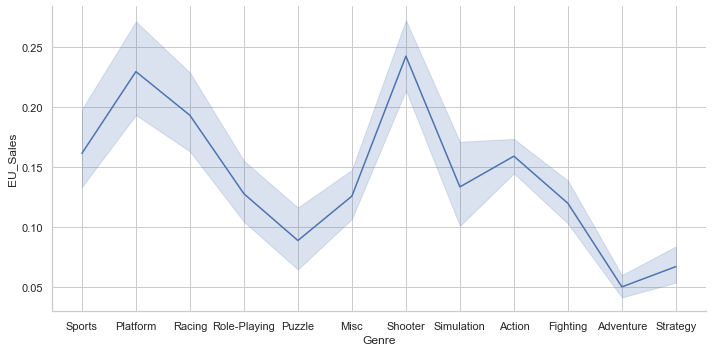

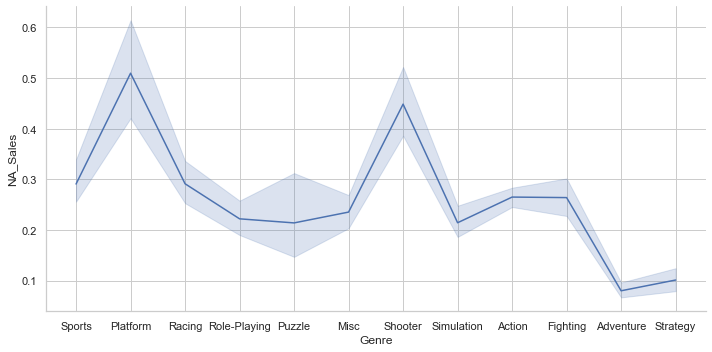

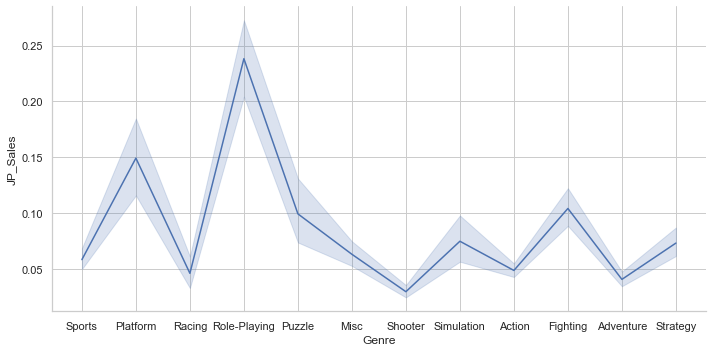

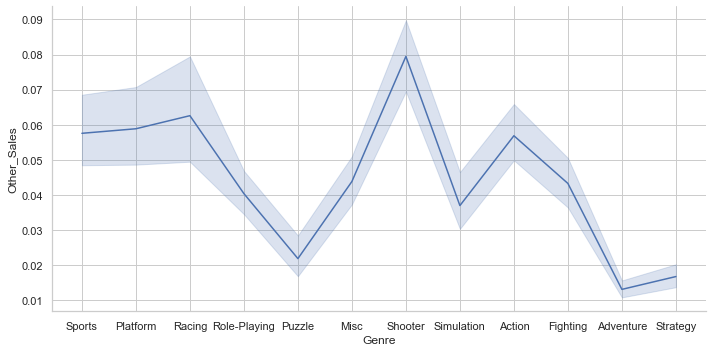

In [108]:
#relational plot between Genre and EU_Sales
sns.relplot(
    data=df, 
    x="Genre", y="EU_Sales", 
    kind="line",
    height=5, aspect=2
)
#relational plot between Genre and NA_Sales
sns.relplot(
    data=df, 
    x="Genre", y="NA_Sales", 
    kind="line",
    height=5, aspect=2
)
#relational plot between Genre and JP_Sales
sns.relplot(
    data=df, 
    x="Genre", y="JP_Sales", 
    kind="line",
    height=5, aspect=2
)
#relational plot between Genre and Other_Sales
sns.relplot(
    data=df, 
    x="Genre", y="Other_Sales", 
    kind="line",
    height=5, aspect=2
)

### The Graphs conclude that:
- Sales in Europe is maximum for Platform and Shooter Genre and least for Adventure Genre
- Sales in North America is maximum for Platform Genre and least for Adventure Genre
- Sales in Japan is maximum for Role-Playing Genre and least for Racing, Shooter and Adventure Genre
- Sales in the rest of the world is maximum for Shooter Genre and least for Adventure Genre

In [90]:
df[["Genre","Global_Sales"]].groupby("Genre").sum()

,Global_Sales
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83
Shooter,1026.20


The most sold genre of games globally is Action Genre. The second highest selling genre globally is Sports Genre.

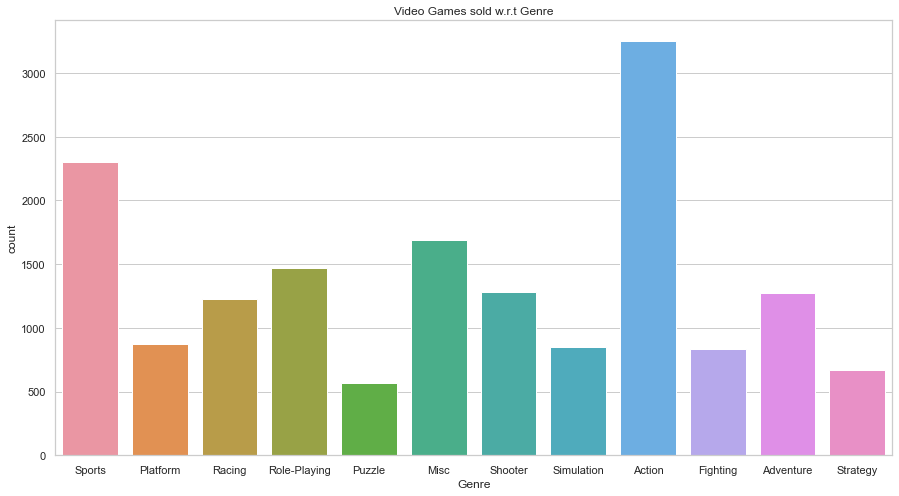

In [95]:
plt.figure(figsize=(15,8))
sns.countplot(x='Genre',data=df).set(title="Video Games sold w.r.t Genre");

### Study of video Games in the year 2009- Year of maximum releases

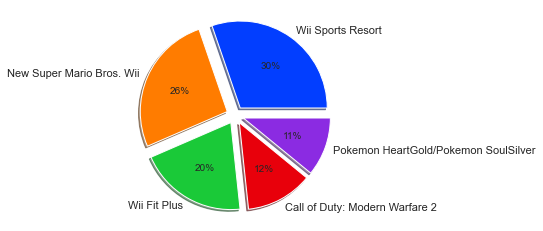

In [84]:
df2009 = df[df.Year == 2009].iloc[:5,:]
pie1 = df2009.Global_Sales
labels = df2009.Name
colors = sns.color_palette('bright')[0:5]
plt.pie(pie1, labels = labels, colors = colors, autopct='%.0f%%', shadow=True, explode=(0.1,0.1,0.1,0.1,0.1))
plt.show()

### Inference:
Maximum number of games were released in the year 2009 in which "Will Sports Resort" had the maximum Global Sales

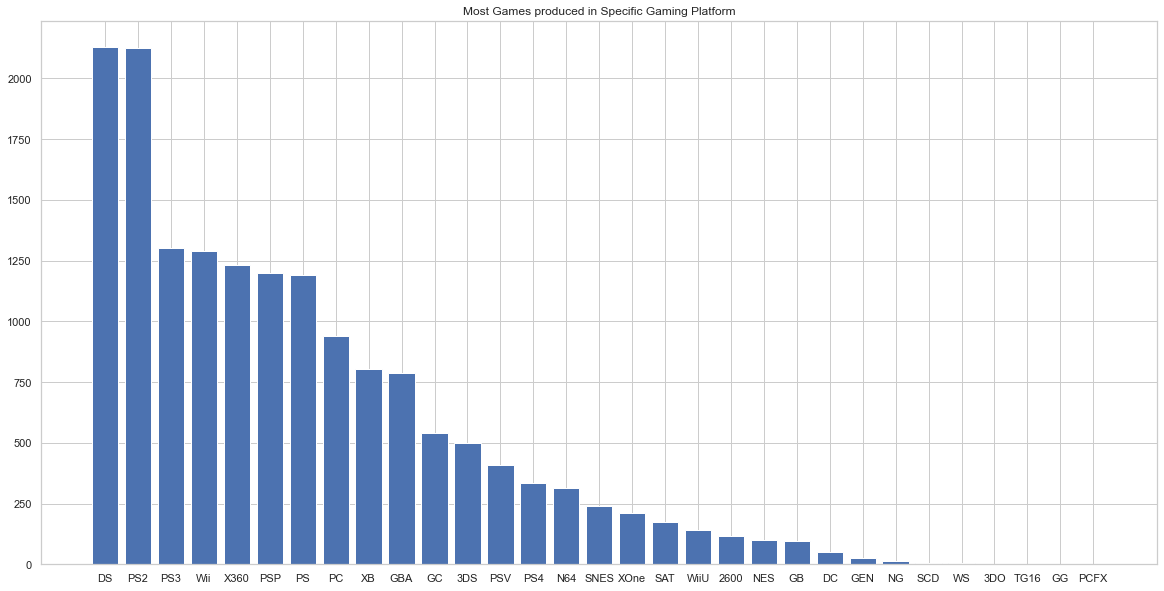

In [88]:
plt.figure(figsize = (20,10))
plt.bar(df["Platform"].value_counts().index, df["Platform"].value_counts())
plt.title("Most Games produced in Specific Gaming Platform")
plt.show()

### DS and PS2 had the maximum games produced

In [96]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


In [97]:
corr = df.corr()

<AxesSubplot:>

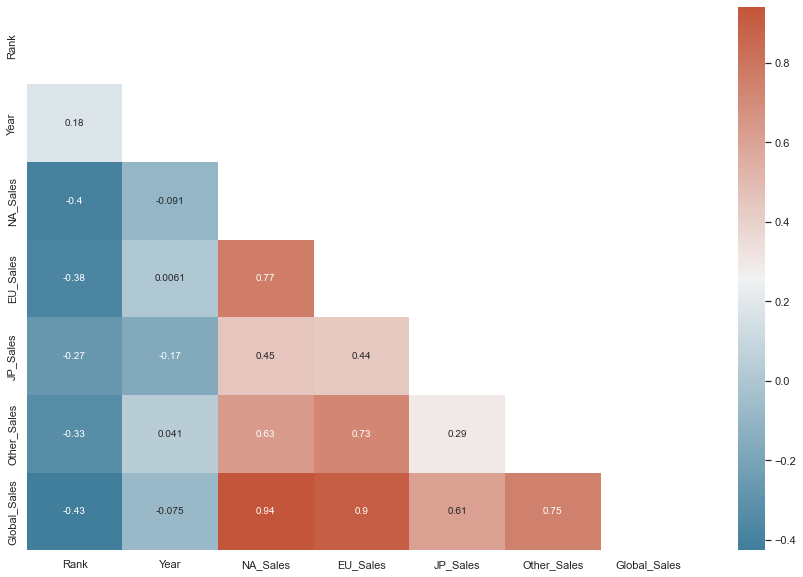

In [104]:
f, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Correlation Graph Reading
* Global Sales is maximum dependent on the Sales in North America, second related to the Europe Sales
- Sales in Europe and worldwide increased with the increasing Year
- Japan Contributes the least in the Global Sales


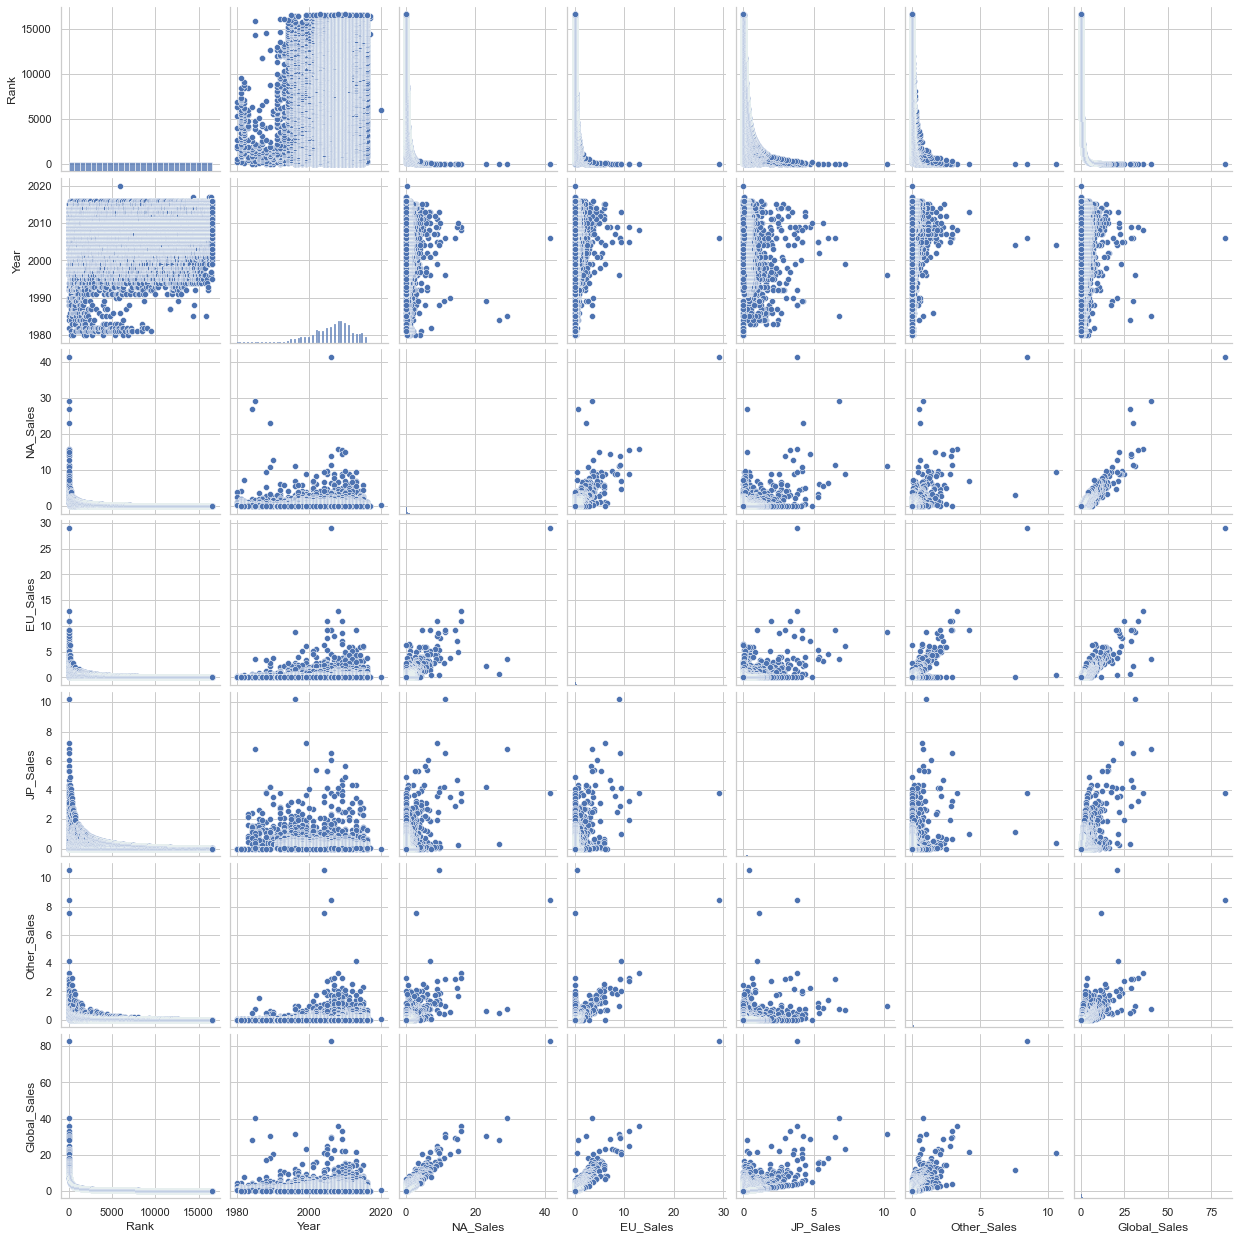

In [99]:
sns.pairplot(df)

Random distribution of graphs showing the relations among the columns.

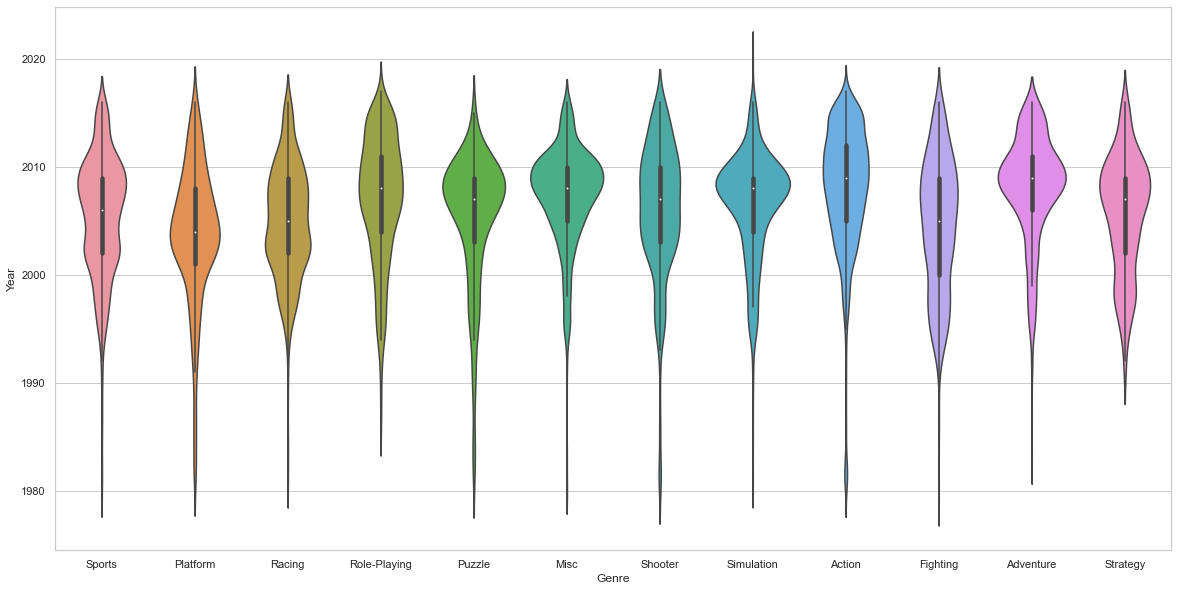

In [112]:
plt.figure(figsize = (20,10))
ax = sns.violinplot(x="Genre", y="Year", data=df)

### This graphs shows the probability density distribution of each Genre over the Years